In [130]:
# 匯入keras
from tensorflow import keras
 
# 以下為做DNN常引入的重要模組
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
import pandas as pd # 資料處理套件
import matplotlib.pyplot as plt # 繪圖套件

## 讀入資料、處理

In [131]:
# 讀入資料集
dots = pd.read_csv("dots.csv")
dots.columns = [ 'x', 'y', 'c' ] # 加上每欄的名稱

In [132]:
# 查看資料前5筆資料
print("前5筆資料\n")
dots.head()

前5筆資料



,x,y,c
0,405,952,0
1,288,138,1
2,566,141,1
3,534,154,1
4,987,686,0


In [133]:
# 分割訓練、測試資料：4/5 拿來訓練、1/5 拿來測試訓練結果
train_i, test_i, train_o, test_o = train_test_split (
    dots.drop(['c'], axis = 1),     # 特徵
    dots['c'],   # 結果
    test_size = 0.4  #測試資料占 1/5
)

In [134]:
print (train_i)
print (train_o)

       x    y
149  269  316
982  975  686
995  967  794
635  601  383
819  357  731
..   ...  ...
546   86   84
934  377  988
494  699  567
539  959  548
316  733  652

[599 rows x 2 columns]
149    1
982    0
995    0
635    0
819    0
      ..
546    1
934    0
494    0
539    0
316    0
Name: c, Length: 599, dtype: int64


## 類神經網路模型建構與執行

In [135]:
#模型初始化
model = Sequential()
#類神經網路建構
model.add(Dense(10, input_dim=2))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(1))

In [136]:
#類神經網路編譯
model.compile(loss="mse",optimizer='adam')

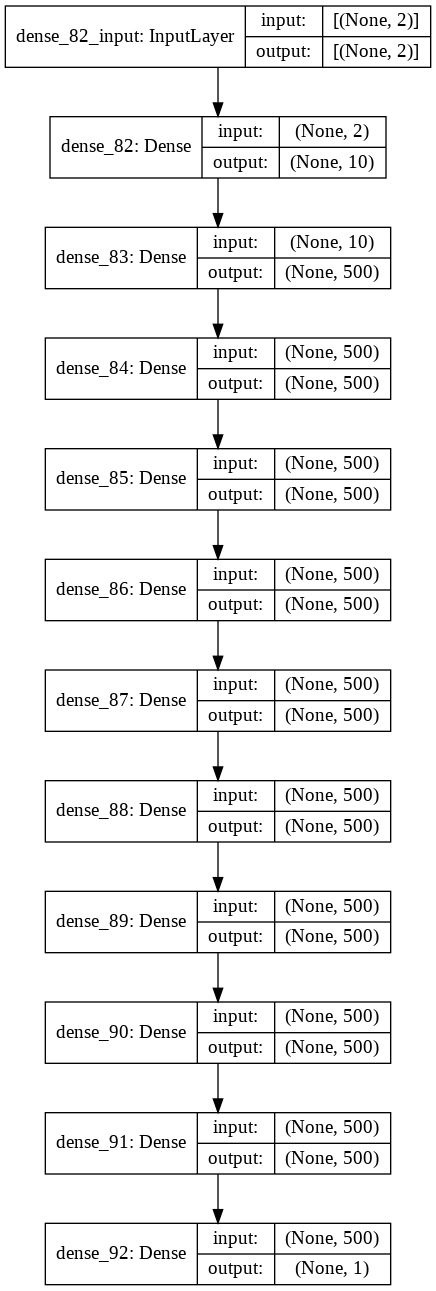

In [137]:
#類神經網路視覺化
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [138]:
#模型訓練
history = model.fit(train_i,train_o,    #輸入與輸出
          epochs = 100,      #迭代數
          verbose = 1,      #顯示訓練過程
          validation_split = 0.4, #驗證資料分割比例
)

Epoch 1/100
12/12 [==============================] - 1s 48ms/step - loss: 262.2343 - val_loss: 0.5028
Epoch 2/100
12/12 [==============================] - 0s 31ms/step - loss: 0.5041 - val_loss: 0.2972
Epoch 3/100
12/12 [==============================] - 0s 30ms/step - loss: 0.3031 - val_loss: 0.2909
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 0.2376 - val_loss: 0.4811
Epoch 5/100
12/12 [==============================] - 0s 31ms/step - loss: 0.3319 - val_loss: 0.4540
Epoch 6/100
12/12 [==============================] - 0s 30ms/step - loss: 0.3084 - val_loss: 0.2692
Epoch 7/100
12/12 [==============================] - 0s 30ms/step - loss: 0.2448 - val_loss: 0.2826
Epoch 8/100
12/12 [==============================] - 0s 31ms/step - loss: 0.2010 - val_loss: 0.2881
Epoch 9/100
12/12 [==============================] - 0s 31ms/step - loss: 0.2067 - val_loss: 0.2437
Epoch 10/100
12/12 [==============================] - 0s 29ms/step - loss: 0.1969 - val_loss: 0.24

## 結果與評估

In [139]:
# 使用訓練結果 (inference, 推論)：拿先前分割為測試集的資料 test_i 來測試
inference_o = model.predict(test_i)

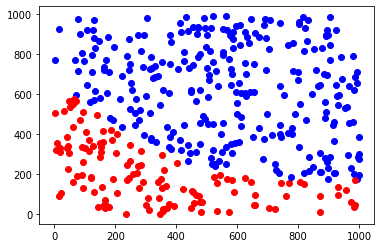

In [140]:
# 畫出 test_i 子資料集的推論結果
inf_o_list = inference_o.tolist()
# plt.gca().invert_yaxis()
for i in range (len (inf_o_list)):
  plt.plot (test_i.iloc [i]['x'], test_i.iloc [i]['y'], 'bo' if inf_o_list [i][0] < .4 else 'ro')

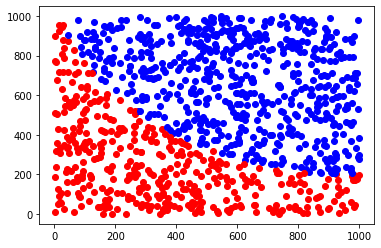

In [141]:
# 比較原來的資料
# plt.gca().invert_yaxis()
for index, row in dots.iterrows():
  plt.plot (row['x'], row['y'], 'bo' if row ['c'] == 0 else 'ro')

In [142]:
#結果評估
train_result = model.evaluate(train_i,train_o) # 先以 train_i 為輸入用訓練好的 model 做推論，然後和 train_o (期望正確的輸出) 做比較，算出誤差後回傳值設定為 train_result
test_result = model.evaluate(test_i,test_o) # 先以 test_i 為輸入用訓練好的 model 做推論，然後和 test_o (期望正確的輸出) 做比較，算出誤差後回傳值設定為 test_result
print("-----------")
print("train loss:", train_result)
print("test loss:", test_result)

13/13 [==============================] - 0s 7ms/step - loss: 0.1014
-----------
train loss: 0.07978875935077667
test loss: 0.10143780708312988


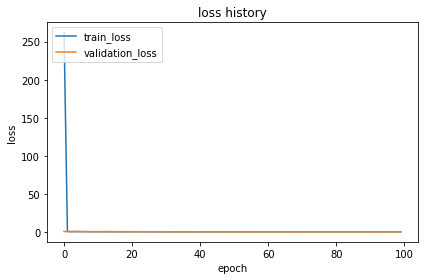

In [143]:
# 訓練過程 (損失) 誤差變化
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss', 'validation_loss'], loc = 'upper left')
plt.xlabel("epoch")
 
plt.tight_layout()
plt.show()

In [144]:
# 計算原來希望訓練後的模型推論成 1 的測資實際推論為甚麼值的平均值
rdi = dots.loc [dots ['c'] == 1]
rdo = model.predict (rdi.drop (['c'], axis = 1))
sum (rdo) / len (rdo)

array([0.6814846], dtype=float32)

In [145]:
# 計算原來希望訓練後的模型推論成 0 的測資實際推論為甚麼值的平均值
bli = dots.loc [dots ['c'] == 0]
blo = model.predict (bli.drop (['c'], axis = 1))
sum (blo) / len (blo)

array([-0.01170152], dtype=float32)